# Python for Data Science // S.15 // Model Deployment // PYTN-KS09
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [4]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

In [5]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


## Data Cleaning / Handling missing values

In [7]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


## Exploring Data by each Features

In [8]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


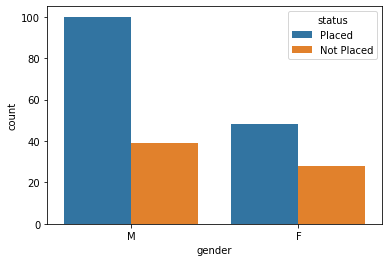

In [9]:
sns.countplot("gender", hue="status", data=data)
plt.show()

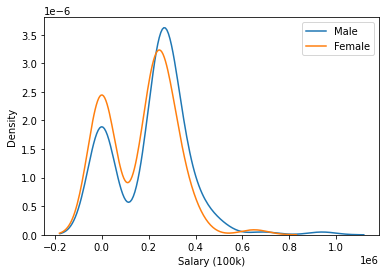

In [10]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


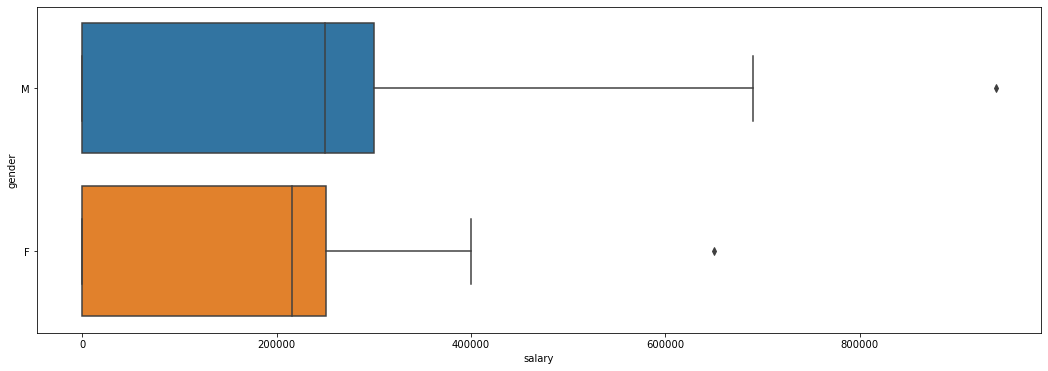

In [11]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


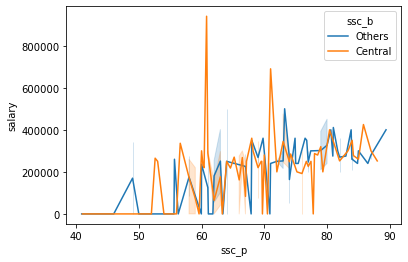

In [12]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

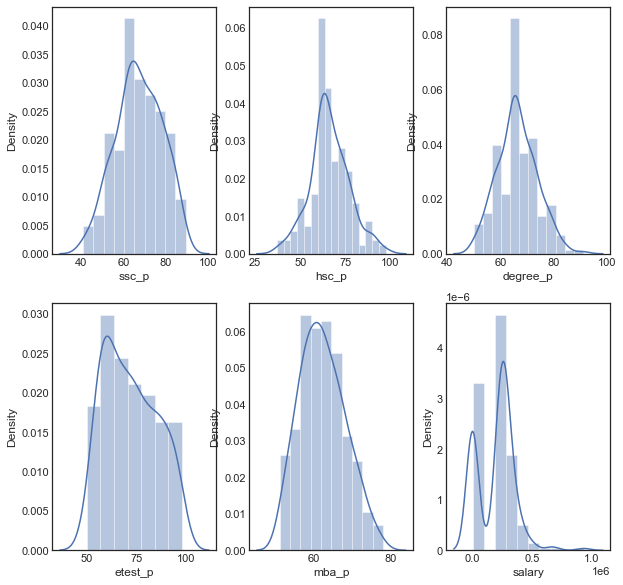

In [14]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

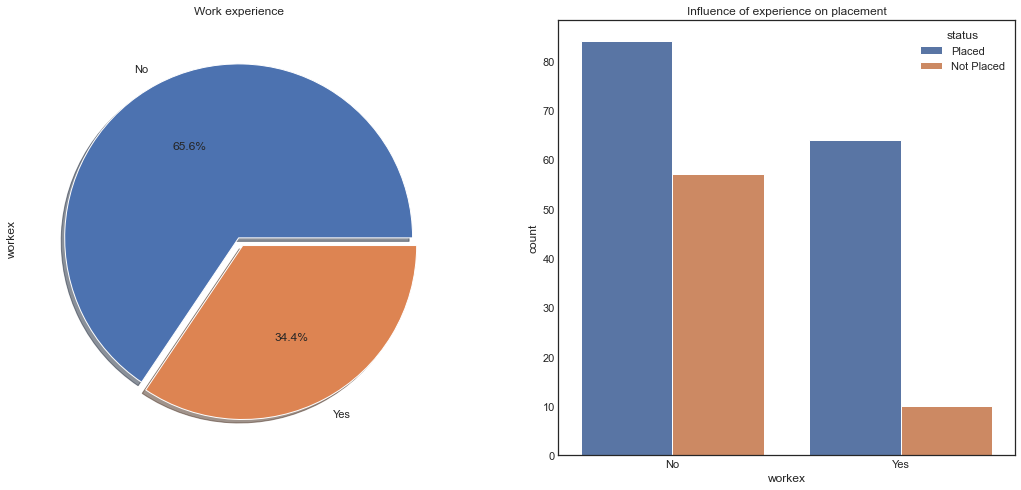

In [15]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data)
ax[1].set_title('Influence of experience on placement')

plt.show()

## Preprocessing data for classfication models

In [16]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [17]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [19]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8153846153846154
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.90      0.83      0.86        46

    accuracy                           0.82        65
   macro avg       0.78      0.81      0.79        65
weighted avg       0.83      0.82      0.82        65



In [21]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8923076923076924
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.90      0.96      0.93        46

    accuracy                           0.89        65
   macro avg       0.89      0.85      0.86        65
weighted avg       0.89      0.89      0.89        65



In [22]:
#Using Logistic Regression

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8769230769230769
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.88      0.96      0.92        46

    accuracy                           0.88        65
   macro avg       0.87      0.82      0.84        65
weighted avg       0.88      0.88      0.87        65



---

## Getting ready for deployment

**Pickle**

Modul pickle Python digunakan untuk serializing dan de-serializing struktur objek python. Objek apapun dnegan Python dapat dibuat pickled sehingga dapat disimpan di disk. Apa yang dilakukan pickle adalah 'serializes' objek terlebih dahulu sebelum menulisnya ke file. Pickling adalah cara untuk mengubah objek python (list, dict, etc.)

In [23]:
pickle.dump(dtree, open('model_classifier.pkl','wb'))